### Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
index = pd.read_csv('sp500_index.csv')
company = pd.read_csv('sp500_companies.csv')
stock = pd.read_csv('sp500_stocks.csv')

In [3]:
index.describe()

,S&P500
count,2530.000000
mean,3065.065731
std,928.933297
min,1815.690000
25%,2159.780000
50%,2831.640000
75%,3961.292500
max,5175.270000


In [4]:
company.describe()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,503.000000,5.030000e+02,4.750000e+02,502.000000,4.930000e+02,503.000000
mean,215.694553,9.513216e+10,6.505347e+09,0.041564,5.701755e+04,0.001988
std,447.595481,2.669158e+11,1.419527e+10,0.199893,1.387860e+05,0.005578
min,8.480000,4.306185e+09,-3.618000e+09,-0.582000,2.800000e+01,0.000090
25%,63.180000,1.786635e+10,1.460550e+09,-0.042750,1.020000e+04,0.000373
50%,120.380000,3.418666e+10,2.776000e+09,0.037000,2.100000e+04,0.000714
75%,236.175000,7.230117e+10,5.724128e+09,0.108000,5.300000e+04,0.001511
max,7630.840000,3.100871e+12,1.356820e+11,2.653000,2.100000e+06,0.064802


In [6]:
company.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,417.32,3100871229440,1.184270e+11,0.176,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.064802
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,173.72,2682566737920,1.301090e+11,0.021,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.056060
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,884.55,2211374956544,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics, and comp...",0.046213
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,147.68,1841613766656,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.038486
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,148.48,1839489089536,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.038442


### Data Cleaning

In [8]:
company.isna().sum()

Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 28
Revenuegrowth           1
City                    0
State                  20
Country                 0
Fulltimeemployees      10
Longbusinesssummary     0
Weight                  0
dtype: int64

In [9]:
company = company.dropna()
company.isna().sum()

Exchange               0
Symbol                 0
Shortname              0
Longname               0
Sector                 0
Industry               0
Currentprice           0
Marketcap              0
Ebitda                 0
Revenuegrowth          0
City                   0
State                  0
Country                0
Fulltimeemployees      0
Longbusinesssummary    0
Weight                 0
dtype: int64

In [11]:
company.columns

Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')

In [12]:
industry_group = company.groupby(['Industry','Sector'])
industry_group

In [13]:
aggregate_stats = industry_group.agg({
    'Marketcap':'mean',
    'Ebitda':'median',
    'Revenuegrowth':'mean'
})
aggregate_stats

,,Marketcap,Ebitda,Revenuegrowth
Industry,Sector,,,
Advertising Agencies,Communication Services,1.532295e+10,2.031950e+09,0.030500
Aerospace & Defense,Industrials,6.090035e+10,3.416000e+09,0.128091
Agricultural Inputs,Basic Materials,1.828544e+10,2.734900e+09,-0.254750
Airlines,Industrials,1.704568e+10,7.046500e+09,0.063250
Apparel Manufacturing,Consumer Cyclical,8.646404e+09,1.021286e+09,-0.053000
...,...,...,...,...
Utilities - Regulated Electric,Utilities,3.355942e+10,4.711861e+09,-0.076826
Utilities - Regulated Gas,Utilities,1.466749e+10,1.935163e+09,-0.192500
Utilities - Regulated Water,Utilities,2.283113e+10,2.240000e+09,0.108000


In [14]:
aggregate_stats.reset_index(inplace=True)
aggregate_stats

,Industry,Sector,Marketcap,Ebitda,Revenuegrowth
0,Advertising Agencies,Communication Services,1.532295e+10,2.031950e+09,0.030500
1,Aerospace & Defense,Industrials,6.090035e+10,3.416000e+09,0.128091
2,Agricultural Inputs,Basic Materials,1.828544e+10,2.734900e+09,-0.254750
3,Airlines,Industrials,1.704568e+10,7.046500e+09,0.063250
4,Apparel Manufacturing,Consumer Cyclical,8.646404e+09,1.021286e+09,-0.053000
...,...,...,...,...,...
107,Utilities - Regulated Electric,Utilities,3.355942e+10,4.711861e+09,-0.076826
108,Utilities - Regulated Gas,Utilities,1.466749e+10,1.935163e+09,-0.192500
109,Utilities - Regulated Water,Utilities,2.283113e+10,2.240000e+09,0.108000
110,Utilities - Renewable,Utilities,5.346605e+10,4.144000e+09,-0.210000


### Selecting top 10 industries based on market capitalization

In [15]:
top_industries = aggregate_stats.nlargest(10,'Marketcap')['Industry']
top_industries

23              Consumer Electronics
55    Internet Content & Information
56                   Internet Retail
49           Insurance - Diversified
66              Oil & Gas Integrated
92         Software - Infrastructure
90                    Semiconductors
27                   Discount Stores
25                   Credit Services
45           Home Improvement Retail
Name: Industry, dtype: object

In [17]:
top_industries_data = company[company['Industry'].isin(top_industries)]
top_industries_data

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,417.32,3100871229440,1.184270e+11,0.176,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.064802
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,173.72,2682566737920,1.301090e+11,0.021,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.056060
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,884.55,2211374956544,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics, and comp...",0.046213
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,147.68,1841613766656,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.038486
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,148.48,1839489089536,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.038442
5,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,174.48,1812393492480,8.551500e+10,0.139,Seattle,WA,United States,1525000.0,"Amazon.com, Inc. engages in the retail sale of...",0.037875
6,NMS,META,"Meta Platforms, Inc.","Meta Platforms, Inc.",Communication Services,Internet Content & Information,496.98,1267005784064,6.138100e+10,0.247,Menlo Park,CA,United States,67317.0,"Meta Platforms, Inc. engages in the developmen...",0.026478
7,NYQ,BRK-B,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.,Financial Services,Insurance - Diversified,408.41,885833138176,1.356820e+11,0.196,Omaha,NE,United States,396500.0,"Berkshire Hathaway Inc., through its subsidiar...",0.018512
10,NMS,AVGO,Broadcom Inc.,Broadcom Inc.,Technology,Semiconductors,1237.24,573362995200,2.040400e+10,0.164,Palo Alto,CA,United States,20000.0,"Broadcom Inc. designs, develops, and supplies ...",0.011982
13,NYQ,WMT,Walmart Inc.,Walmart Inc.,Consumer Defensive,Discount Stores,60.86,490092789760,3.886500e+10,0.057,Bentonville,AR,United States,2100000.0,Walmart Inc. engages in the operation of retai...,0.010242


### Data Visualization

#### Market Capitalization by Industry (Top 10)

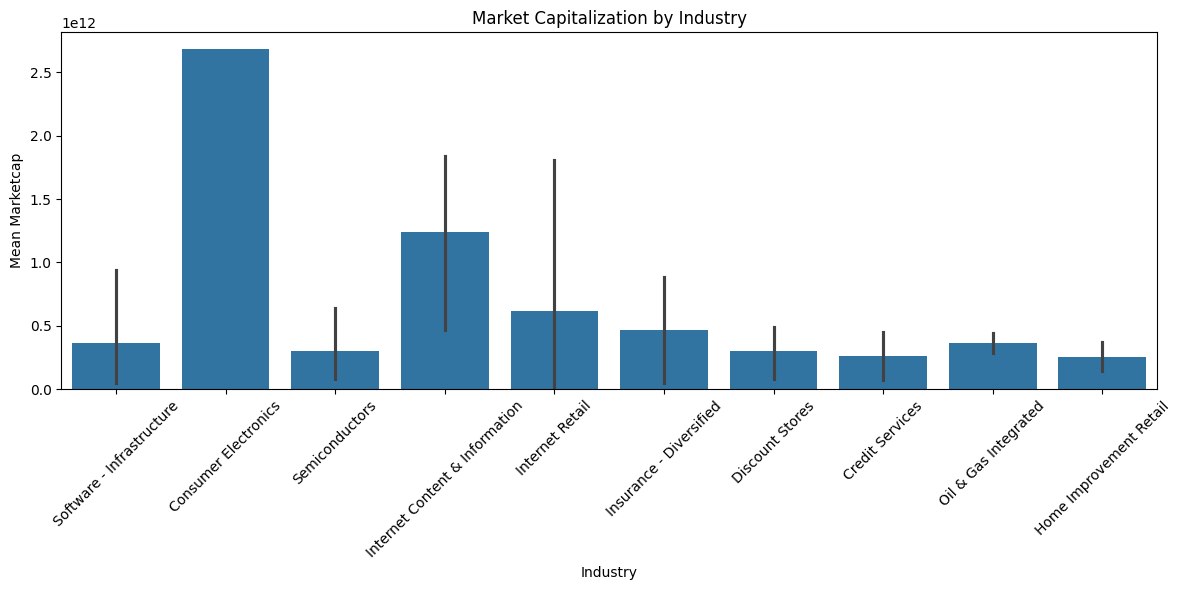

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_industries_data,x='Industry',y='Marketcap')
plt.xticks(rotation=45)
plt.title('Market Capitalization by Industry')
plt.xlabel('Industry')
plt.ylabel('Mean Marketcap')
plt.tight_layout()
plt.show()

#### Distribution of EBITDA by sector for the top 10 industries

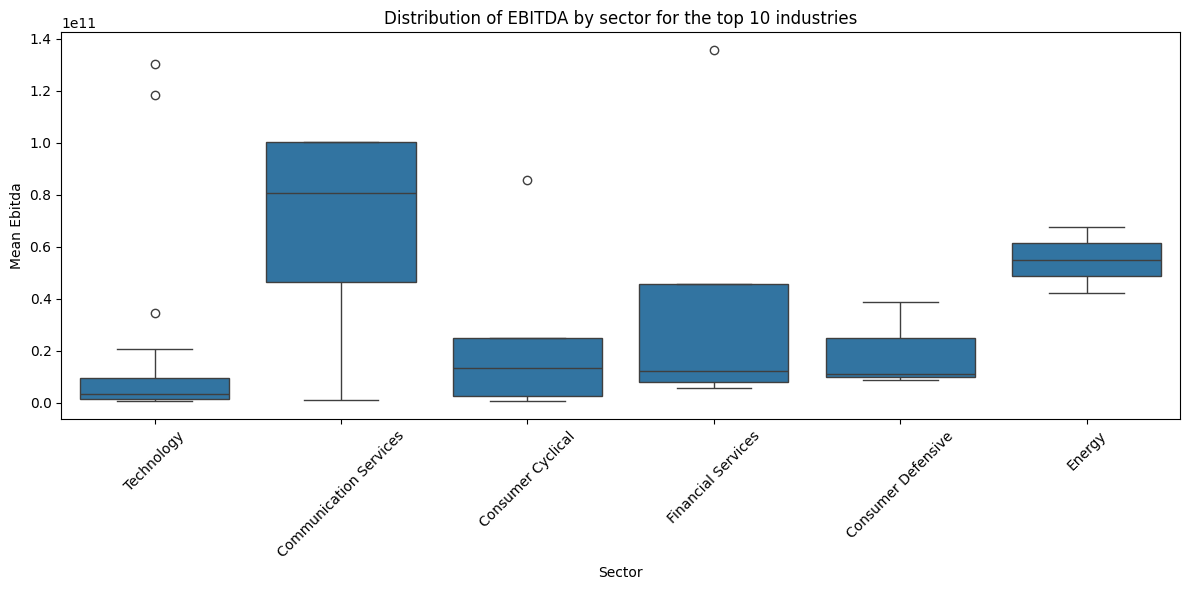

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=top_industries_data,x='Sector',y='Ebitda')
plt.xticks(rotation=45)
plt.title('Distribution of EBITDA by sector for the top 10 industries')
plt.xlabel('Sector')
plt.ylabel('Mean Ebitda')
plt.tight_layout()
plt.show()

#### Revenuegrowth vs Marketcap

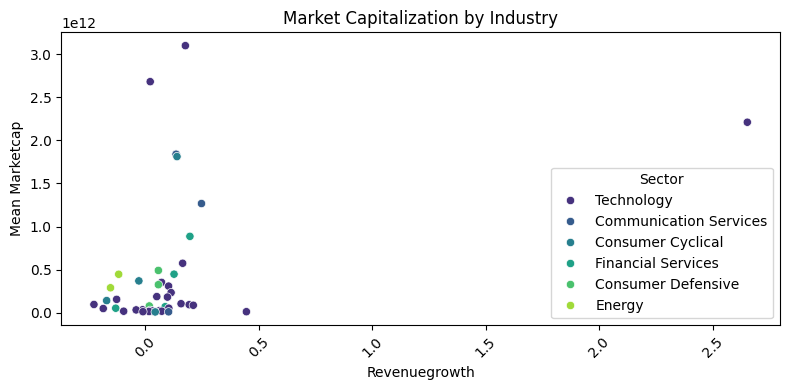

In [33]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=top_industries_data,x='Revenuegrowth',y='Marketcap',hue='Sector', palette='viridis')
plt.xticks(rotation=45)
plt.title('Market Capitalization by Industry')
plt.xlabel('Revenuegrowth')
plt.ylabel('Mean Marketcap')
plt.tight_layout()
plt.show()

#### Revenuegrowth vs Industry

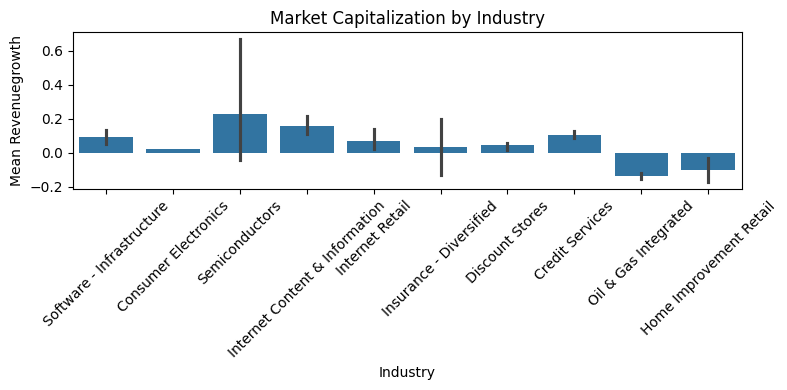

In [39]:
plt.figure(figsize=(8,4))
sns.barplot(data=top_industries_data,x='Industry',y='Revenuegrowth')
plt.xticks(rotation=45)
plt.title('Market Capitalization by Industry')
plt.xlabel('Industry')
plt.ylabel('Mean Revenuegrowth')
plt.tight_layout()
plt.show()

#### Distribution of companies by Sector

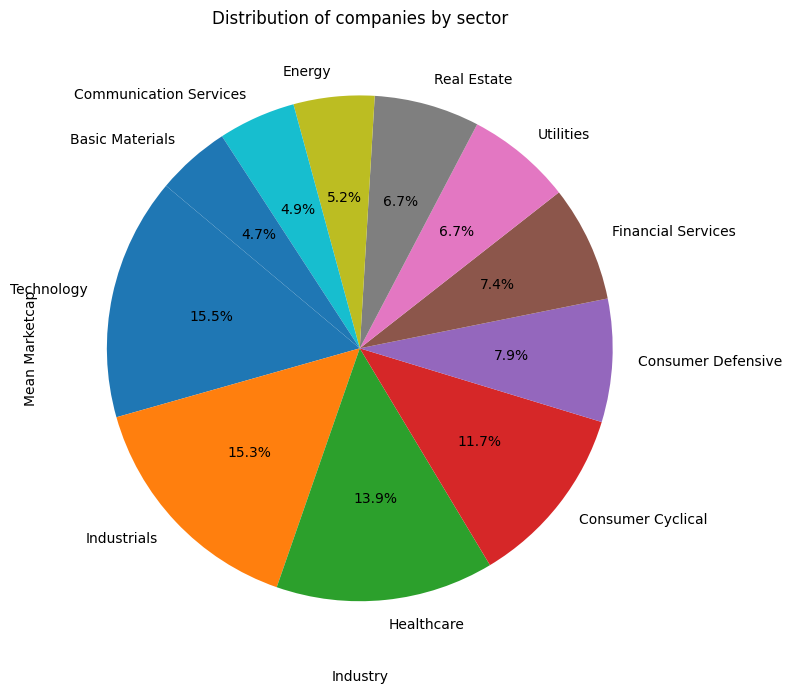

In [55]:
plt.figure(figsize=(8,8))
company['Sector'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=140)
plt.xticks(rotation=45)
plt.title('Distribution of companies by sector')
plt.xlabel('Industry')
plt.ylabel('Mean Marketcap')
plt.tight_layout()
plt.show()

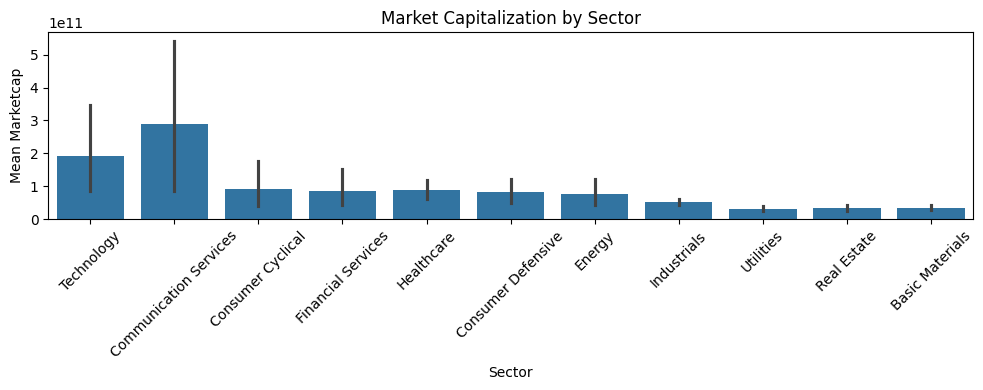

In [49]:
plt.figure(figsize=(10,4))
sns.barplot(data=company,x='Sector',y='Marketcap')
plt.xticks(rotation=45)
plt.title('Market Capitalization by Sector')
plt.xlabel('Sector')
plt.ylabel('Mean Marketcap')
plt.tight_layout()
plt.show()

#### Revenuegrowth

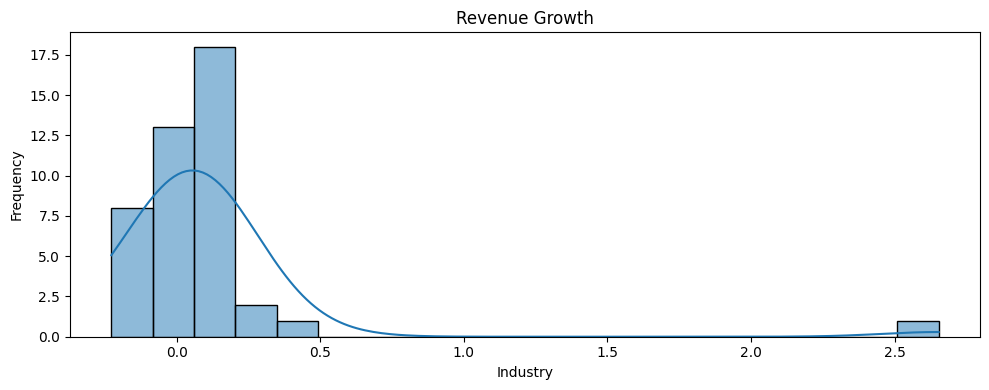

In [52]:
plt.figure(figsize=(10,4))
sns.histplot(data=top_industries_data,x='Revenuegrowth',kde=True,bins=20)
plt.title('Revenue Growth')
plt.xlabel('Industry')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()